## slot waveguides, MIMIM waveguides etc.
We want to analyze leakage for more complex geometries, so we use something from Prof. Fan's EE236 class


### Slot Waveguide
We analyze the TM mode (Hy, Ex, Ez). The Ez field is discontinuous
We also need the Hy field.

The transcendental dispersion being solved is:
\begin{equation}
    \epsilon_r \bigg(\frac{\alpha}{k_x}\bigg)\tanh(\alpha a) = \tan(k_x(b-a)-\phi)
\end{equation}

where:
\begin{equation}
    \phi = \tan^{-1}\bigg(\epsilon_r\frac{\alpha}{k_x}\bigg)
\end{equation}

In this particular situation, we are assuming solutions of the form:
\begin{equation}
    H_y = \begin{cases}
        Ce^{-\alpha(x-b)} & x>b\\
        A\cosh(\alpha x)  & 0 < x< a \\
        B_1 \cos(k_x(x-a)) + B_2\sin(k_x(x-a)) & a<x<b
    \end{cases}
\end{equation}

where 0 to a is the slot region, a to b is the waveguide region and beyond b is the infinite half space.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

L0 = 1e-6;
wavelength = 1.55*L0;
eps0 = 8.854e-12;
mu0 = 4*np.pi*10e-7;
c0 = 1/np.sqrt(mu0*eps0);

omega = 2*np.pi*c0/wavelength; 

# waveguide parameters
a = 0.05*L0;##0.025*L0; #a gap size
b = a+0.25*L0; #waveguide size
delta = b-a;

n_c = 1; n_s = 1; #cover and substrate
n_film = 3.48;
eps_film = n_film**2;
kx_max = np.sqrt(omega**2/c0**2*(eps_film-1)); # = kx^2+alpha^2;

beta = np.linspace(1.4*omega/c0, 1.65*omega/c0, 1e7); 

## dispersion relations
kx = np.sqrt(eps_film*omega**2/c0**2 - beta**2);
#as we have -alpha^2, we must have beta larger than omega/c0
alpha = np.sqrt(beta**2 - omega**2/c0**2);

# %what we have now are circles, but we need to know what alphas
# % and what kx's are actually allowed
# % part c) in the homework gives us relationship between kx and alpha

a_kx_ratio = alpha/kx;
RHS = eps_film*(a_kx_ratio)*np.tanh(alpha*a);
# figure()
# plot(kx, RHS, 'linewidth', 2)
# hold on;
phi = np.arctan(eps_film*(a_kx_ratio)); #phase shift
LHS = np.tan(kx*delta - phi) ;
# plot(kx, LHS, 'linewidth', 2)
# xlabel('kx (1/m)')
# legend('RHS of dispersion', 'LHS of dispersion')
# title('Graphical Solution to Dispersion Relation')

# %get the allowed kx and alpha (this is where RHS = LHS
match = 0;
for i in range(len(LHS)):
    if(abs(LHS[i] - RHS[i])/abs(LHS[i])<1e-7):
        match = i;
    
## plot the Ex field given kx and alpha information and beta
kx = kx[i];
alpha = alpha[i];
beta = (eps_film*omega**2/c0**2 - kx**2)**.5; 

# test the dispersion relations at this point
x1 = np.linspace(0, a, 1000);
x2 = np.linspace(a, b, 1000);
x3 = np.linspace(b, 500e-9, 1000);

A = 1; #free parameter A
coef= A; #we don't even need beta/omega

a_kx = alpha/kx;

B1 = np.cosh(alpha*a);
B2 = (alpha*eps_film/kx)*np.sinh(alpha*a);
C =  (np.cosh(alpha*a)*np.cos(kx*delta) +(eps_film*alpha/kx)*np.sinh(alpha*a)*np.sin(kx*delta));

## Hy field
Hz1 = np.cosh(alpha*x1);
Hz2= B1*np.cos(kx*(x2-a))+B2*np.sin(kx*(x2-a));
Hz3 = C*np.exp(-alpha*(x3-b));


## directly model the electric field in half of the structure (structure is symmetric about x =0)
E1 = np.cosh(alpha*x1);
E2 = ((np.cosh(alpha*a)/eps_film)*np.cos(kx*(x2-a)) + \
    (alpha/kx)*np.sinh(alpha*a)*np.sin(kx*(x2-a)));
E3 = (np.cosh(alpha*a)*np.cos(kx*delta) + \
    (eps_film*alpha/kx)*np.sinh(alpha*a)*np.sin(kx*delta))*np.exp(-alpha*(x3-b));
   
E1_max = max(abs(E1));E2_max = max(abs(E2));
E3_max = max(abs(E3));

E_max = max([E1_max, E2_max, E3_max]);
E1 = E1/E_max; E2 = E2/E_max; E3 = E3/E_max;
#normalize by max field intensity

print(a,b)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


5e-08 3e-07


5.320197876172056


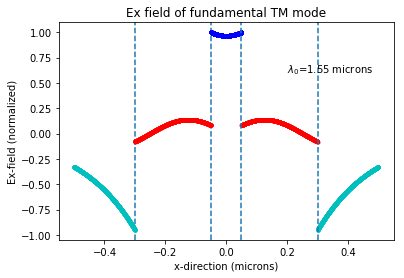

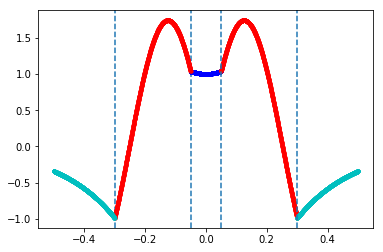

In [4]:
plt.plot(x1/L0, E1, '.b')
plt.plot(x2/L0, E2, '.r')
plt.plot(x3/L0, E3, '.c')
plt.axvline(a/L0, linestyle = '--');
plt.axvline(b/L0, linestyle = '--')
plt.axvline(-a/L0, linestyle = '--');
plt.axvline(-b/L0, linestyle = '--')

plt.plot(-x1/L0, E1, '.b')
plt.plot(-x2/L0, E2, '.r')
plt.plot(-x3/L0, E3, '.c')
plt.ylabel('Ex-field (normalized)')
plt.xlabel('x-direction (microns)')
plt.title('Ex field of fundamental TM mode')
plt.text(0.2,0.6,'$\lambda_0$=1.55 microns')
print(alpha*L0)

plt.figure();
plt.plot(x1/L0, Hz1, '.b')
plt.plot(x2/L0, Hz2, '.r')
plt.plot(x3/L0, Hz3, '.c')
plt.axvline(a/L0, linestyle = '--');
plt.axvline(b/L0, linestyle = '--')
plt.axvline(-a/L0, linestyle = '--');
plt.axvline(-b/L0, linestyle = '--')
plt.plot(-x1/L0, Hz1, '.b')
plt.plot(-x2/L0, Hz2, '.r')
plt.plot(-x3/L0, Hz3, '.c')

## Application to Adjacent air core (MIMIM) waveguides
In this situation, we should be able to modify the existing solution for the dielectric slot waveguide. Let's start with the out of plane H field in the TM polarization:
In this particular situation, we are assuming solutions of the form:
\begin{equation}
    H_y = \begin{cases}
        Ce^{-\alpha(x-b)} & x>b\\
        A\cosh(\alpha x)  & 0 < x< a \\
        B_1 \cos(k_x(x-a)) + B_2\sin(k_x(x-a)) & a<x<b
    \end{cases}
\end{equation}
In fact, it is not even clear to me that it is necessary to change the form of this solution. AS it stands, in a metal, we have a decaying field and in the separator wall, we also have a decaying field, which must be even.

In order to evaluate the correct solutions using Newton's algorith, we will also need to give the analytic first derivative of the dispersion, as such:
\begin{equation}
    \epsilon_r \bigg(\frac{\alpha}{k_x}\bigg)\tanh(\alpha a) = \tan(k_x(b-a)-\phi)
\end{equation}

where:
\begin{equation}
    \phi = \tan^{-1}\bigg(\epsilon_r\frac{\alpha}{k_x}\bigg)
\end{equation}

We are solving for $k_x$ in this equation, so the derivative looks like it will be quite complicated.

In [6]:
from scipy.optimize import newton
## need newton for this...since we have to probe complex space

L0 = 1e-6;
wavelength = 1.55*L0;
eps0 = 8.854e-12;
mu0 = 4*np.pi*10e-7;
c0 = 1/np.sqrt(mu0*eps0);

omega = 2*np.pi*c0/wavelength; 

# waveguide parameters
a = 0.05*L0;##0.025*L0; #a gap size
b = a+0.1*L0; #waveguide size
delta = b-a;

n_c = 1; n_s = 1; #cover and substrate
n_film = 1;
eps_film = n_film**2;
n_c = -1;
n_s = -1;
kx_max = np.sqrt(omega**2/c0**2*(eps_film-1)); # = kx^2+alpha^2;

beta = np.linspace(1.4*omega/c0, 1.65*omega/c0, 1e7); 

def mimim_even(beta, a= a, n_c = n_c, n_s = n_s, eps_film = eps_film):
    '''
    uses same transcendental dispersion used for dielectric slot waveguides
    '''
    alpha = np.sqrt(beta**2 - omega**2/c0**2);
    kx = np.sqrt(eps_film*omega**2/c0**2 - beta**2);
    a_kx_ratio = alpha/kx;
    RHS = eps_film*(a_kx_ratio)*np.tanh(alpha*a);
    phi = np.arctan(eps_film*(a_kx_ratio)); #phase shift
    LHS = np.tan(kx*delta - phi) ;
    return RHS-LHS;

def mimim_even_derivative():
    return;


initial_guess = 20*1j; #does initial have to be real?
kans = newton(mimim_even,  x0 = initial_guess, maxiter = 1000)
print('kappa_i: '+str(kans)); #want it to be imaginary for large core sizes


beta = (eps_film*omega**2/c0**2 - kx**2)**.5; 

# test the dispersion relations at this point
x1 = np.linspace(0, a, 1000);
x2 = np.linspace(a, b, 1000);
x3 = np.linspace(b, 500e-9, 1000);

A = 1; #free parameter A
coef= A; #we don't even need beta/omega

a_kx = alpha/kx;

B1 = np.cosh(alpha*a);
B2 = (alpha*eps_film/kx)*np.sinh(alpha*a);
C =  (np.cosh(alpha*a)*np.cos(kx*delta) +(eps_film*alpha/kx)*np.sinh(alpha*a)*np.sin(kx*delta));

## Hy field
Hz1 = np.cosh(alpha*x1);
Hz2= B1*np.cos(kx*(x2-a))+B2*np.sin(kx*(x2-a));
Hz3 = C*np.exp(-alpha*(x3-b));


## directly model the electric field in half of the structure (structure is symmetric about x =0)
E1 = np.cosh(alpha*x1);
E2 = ((np.cosh(alpha*a)/eps_film)*np.cos(kx*(x2-a)) + \
    (alpha/kx)*np.sinh(alpha*a)*np.sin(kx*(x2-a)));
E3 = (np.cosh(alpha*a)*np.cos(kx*delta) + \
    (eps_film*alpha/kx)*np.sinh(alpha*a)*np.sin(kx*delta))*np.exp(-alpha*(x3-b));
   
E1_max = max(abs(E1));E2_max = max(abs(E2));
E3_max = max(abs(E3));

E_max = max([E1_max, E2_max, E3_max]);
E1 = E1/E_max; E2 = E2/E_max; E3 = E3/E_max;
#normalize by max field intensity

print(a,b)
print(E2, E3)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


TypeError: '>=' not supported between instances of 'complex' and 'int'

In [ ]:
plt.plot(x1/L0, E1, '.b')
plt.plot(x2/L0, E2, '.r')
plt.plot(x3/L0, E3, '.c')
plt.axvline(a/L0, linestyle = '--');
plt.axvline(b/L0, linestyle = '--')
plt.axvline(-a/L0, linestyle = '--');
plt.axvline(-b/L0, linestyle = '--')


plt.figure();
plt.plot(x1/L0, Hz1, '.b')
plt.plot(x2/L0, Hz2, '.r')
plt.plot(x3/L0, Hz3, '.c')
plt.axvline(a/L0, linestyle = '--');
plt.axvline(b/L0, linestyle = '--')
plt.axvline(-a/L0, linestyle = '--');
plt.axvline(-b/L0, linestyle = '--')
plt.plot(-x1/L0, Hz1, '.b')
plt.plot(-x2/L0, Hz2, '.r')
plt.plot(-x3/L0, Hz3, '.c')


## Impedance Transformation Method, finite thickness metal slab
Does this method provide a way to study an MIM waveguide? It should as the finite thickness metal slab is just an IMI waveguide. 

It should also be able to provide a way to study arbitrary numbers of layers AS A WAVEGUIDE type system

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


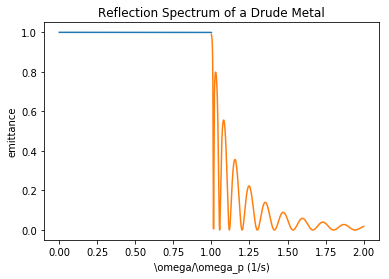

In [20]:
c0 = 3e8; #m/s
mu0 = 4*np.pi*10e-7;
e0 = 8.854e-12;

## we'll define our own plasma frequency
omega_plasma = 2.7e15; #Hz;

omega1 = np.linspace(0, omega_plasma-1, 1000);
omega2 = np.linspace(omega_plasma+1, 2*omega_plasma, 1000);

#convert omegas into lambdas
lambda1 = 2*np.pi*c0/omega1;
lambda2 = 2*np.pi*c0/omega2;

kappa = (omega1/c0)*(omega_plasma**2/omega1**2-1)**.5;
kz = (omega2/c0)*(1 - omega_plasma**2/omega2**2)**.5;

d = 3*2*np.pi*c0/omega_plasma; # scale of microns

#onset of plasmons occurs at omega_p/sqrt(2);

#calculate alpha in the slab
alpha = kappa;

#k is the wavevector pointing down
Z02 = 1j*omega1*mu0/alpha; #inside the slab has a special form
Z01 = np.sqrt(mu0/e0)*1;      #normal incidence;
Z03 = Z01;

## construct the reflection coefficient when omega < omega_p (negative situation)
r_coef = np.tanh(alpha*d)*(Z02**2 - Z01**2)/(2*Z02*Z01 + np.tanh(alpha*d)*(Z01**2 + Z02**2));
R = abs(r_coef)**2;


## ow construct the reflection coefficient when omega > omega_p real situation
#in this case Z02 has a new form 
Z02 = np.sqrt(mu0/e0*(1-omega_plasma**2/omega2**2) +0*1j);
Z = Z02*(Z01 - 1j*Z02*np.tan(-kz*d))/(Z02 - 1j*Z01*np.tan(-kz*d));
r_coef_2 = (Z - Z01)/(Z + Z01);

R2 = abs(r_coef_2)**2;
plt.figure();
plt.plot(omega1/omega_plasma,R)
#hold on;
#line([1,1], [0,1]);
plt.plot(omega2/omega_plasma, R2);
plt.title('Reflection Spectrum of a Drude Metal')
plt.xlabel('\omega/\omega_p (1/s)')
plt.ylabel('emittance')
plt.show();